# W8 Lab Assignment

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as ss

sns.set_style('white')

%matplotlib inline

# Ratio and logarithm

If you use linear scale to visualize ratios, it can be very misleading.

Let's first create some ratios.

In [2]:
x = np.array([1, 1, 1,1, 10, 100, 1000])
y = np.array([1000, 100, 10, 1, 1, 1, 1])
ratio = x/y
print(ratio)

[  1.00000000e-03   1.00000000e-02   1.00000000e-01   1.00000000e+00
   1.00000000e+01   1.00000000e+02   1.00000000e+03]


Plot on the linear scale using the [**`scatter()`**](http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html) function.

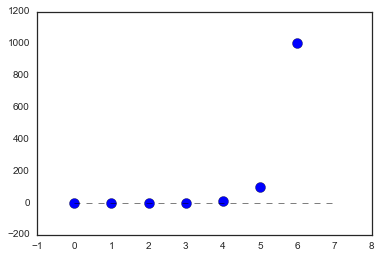

In [3]:
plt.scatter( np.arange(len(ratio)), ratio, s=100 )
plt.plot( [0,len(ratio)], [1,1], color='k', linestyle='--', linewidth=.5 ) # plot the line ratio = 1

Plot on the log scale.

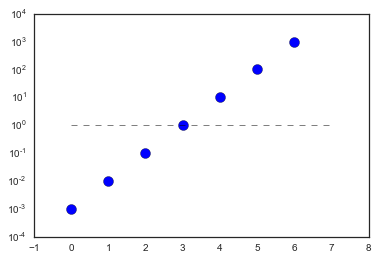

In [4]:
plt.scatter( np.arange(len(ratio)), ratio, s=100 )
plt.yscale('log')
plt.ylim( (0.0001,10000) ) # set the scope the y axis
plt.plot( [0,len(ratio)], [1,1], color='k', linestyle='--', linewidth=.5 )

What do you see from the two plots? Why do we need to use log scale to visualize ratios?

In [ ]:
# TODO: provide your answers

Let's practice this using random numbers. Generate 10 random numbers between [0,1], calculate the ratios between two consecutive numbers (the second number divides by the first, and so on), and plot the ratios on the linear and log scale.

In [ ]:
# TODO: generate random numbers and calculate ratios between two consecutive numbers

In [ ]:
# TODO: plot the ratios on the linear scale

In [ ]:
# TODO: plot the ratios on the log scale

# Log-bin

Let's first see what the histogram looks like if we do not use the log scale.

In [ ]:
# TODO: plot the histogram of movie votes

As we can see, most votes fall in the first bin, and we cannot see the values from the second bin.
How about plotting on the log scale?

In [ ]:
# TODO: change the y scale to log

Change the number of bins to 1000.

In [ ]:
# TODO: set the bin number to 1000

Now, let's try log-bin. Recall that when plotting histgrams we can specify the edges of bins through the `bins` parameter. For example, we can specify the edges of bins to [1, 2, 3, ... , 10] as follows.

In [ ]:
plt.hist( movie_df['Rating'], bins=range(0,11) )

Here, we can specify the edges of bins in a similar way. Instead of specifying on the linear scale, we do it on the log space. Some useful resources:

* [Google query: python log-bin](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=python+log-bin&pws=0)
* [numpy.logspace](http://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html)
* [numpy.linspace vs numpy.logspace](http://stackoverflow.com/questions/31480033/difference-in-output-between-numpy-linspace-and-numpy-logspace)

Hint: since $10^{\text{start}} = \text{min_votes}$, $\text{start} = \log_{10}(\text{min_votes})$

In [ ]:
# TODO: specify the edges of bins using np.logspace
bins = ???

Now we can plot histgram with log-bin.

In [ ]:
plt.hist(movie_df['Votes'], bins=bins)
plt.xscale('log')

In [ ]:
Is this a correct plot? What's the problem? Can you draw a correct one?

In [ ]:
# TODO: correct the plot

# KDE

Import the IMDb data.

In [ ]:
movie_df = pd.read_csv('imdb.csv', delimiter='\t')
movie_df.head()

We can plot histogram and KDE using pandas:

In [ ]:
movie_df['Rating'].hist(bins=10, normed=True)
movie_df['Rating'].plot(kind='kde')

Or using seaborn:

In [ ]:
sns.distplot(movie_df['Rating'], bins=10)

Can you plot the histogram and KDE of the log of movie votes?

In [ ]:
# TODO: implement this using pandas

In [ ]:
# TODO: implement this using seaborn

We can get a random sample using pandas' [**`sample()`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html) function. The [**`kdeplot()`**](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.kdeplot.html) function in seaborn provides many options (like kernel types) to do KDE.

In [ ]:
f = plt.figure(figsize=(15,8))
plt.xlim(0, 10)

sample_sizes = [10, 50, 100, 500, 1000, 10000]
for i, N in enumerate(sample_sizes, 1):
    plt.subplot(2,3,i)
    plt.title("Sample size: {}".format(N))
    for j in range(5):
        s = movie_df['Rating'].sample(N)
        sns.kdeplot(s, kernel='gau', legend=False)

# Regression

Remember [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)? Let's plot the four datasets and do linear regression, which can be done with scipy's [**`linregress()`**](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) function.

**TODO**: display the fitted equations using the [**`text()`**](http://matplotlib.org/users/text_intro.html) function.

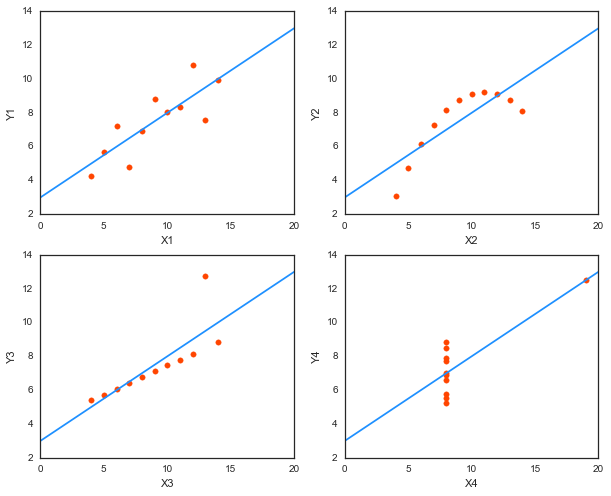

In [5]:
X1 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
Y1 = [8.04, 6.95, 7.58,  8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

X2 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
Y2 = [9.14, 8.14, 8.74,  8.77, 9.26, 8.10, 6.13, 3.10, 9.13,  7.26, 4.74]

X3 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
Y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15,  6.42, 5.73]

X4 = [8.0,  8.0,  8.0,   8.0,  8.0,  8.0,  8.0,  19.0,  8.0,  8.0,  8.0]
Y4 = [6.58, 5.76, 7.71,  8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

data = [ (X1,Y1),(X2,Y2),(X3,Y3),(X4,Y4) ]

plt.figure(figsize=(10,8))

for i,p in enumerate(data, 1):
    X, Y = p[0], p[1]
    plt.subplot(2, 2, i)
    plt.scatter(X, Y, s=30, facecolor='#FF4500', edgecolor='#FF4500')
    slope, intercept, r_value, p_value, std_err = ss.linregress(X, Y)
    plt.plot([0, 20], [intercept, slope*20+intercept], color='#1E90FF') #plot the fitted line Y = slope * X + intercept
    
    # TODO: display the fitted equations using the text() function.

    plt.xlim(0,20)
    plt.xlabel('X'+str(i))
    plt.ylabel('Y'+str(i))

Actually, the dataset is included in seaborn and we can load it. 

In [ ]:
df = sns.load_dataset("anscombe")
df.head()

All four datasets are in this single data frame and the 'dataset' indicator is one of the columns. This is a form often called [tidy data](http://vita.had.co.nz/papers/tidy-data.pdf), which is easy to manipulate and plot. In tidy data, each row is an observation and columns are the properties of the observation. Seaborn makes use of the tidy form. 

We can show the linear regression results for each eadataset. [Here](https://stanford.edu/~mwaskom/software/seaborn/examples/anscombes_quartet.html) is the example:

In [ ]:
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1})

What do these parameters mean? The documentation for the `lmplot()` is [here](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.lmplot.html).

In [ ]:
# TODO: explain what the parameters (x, y, col, hue, etc.) mean?
# Change the values of these parameters and see the results.

# 2-D scatter plot and KDE

Select movies released in the 1990s:

In [ ]:
geq = movie_df['Year'] >= 1990
leq = movie_df['Year'] <= 1999
subset = movie_df[ geq & leq ]
subset.head()

We can draw a scatter plot of movie votes and ratings using the [**`scatter()`**](http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html) function.

In [ ]:
plt.scatter(subset['Votes'], subset['Rating'])
plt.xlabel('Votes')
plt.ylabel('Rating')

Too many data points. We can decrease symbol size, set symbols empty, and make them transparent.

In [ ]:
plt.scatter(subset['Votes'], subset['Rating'], s=20, alpha=0.6, facecolors='none', edgecolors='b')
plt.xlabel('Votes')
plt.ylabel('Rating')

Number of votes is broadly distributed. So set the x axis to log scale.

In [ ]:
plt.scatter(subset['Votes'], subset['Rating'], s=10, alpha=0.6, facecolors='none', edgecolors='b')
plt.xscale('log')
plt.xlabel('Votes')
plt.ylabel('Rating')

We can combine scatter plot with 1D histogram using seaborn's [**`jointplot()`**](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.jointplot.html) function.

In [ ]:
sns.jointplot(np.log(subset['Votes']), subset['Rating'])

## Hexbin

There are too many data points. We need to bin them, which can be done by using the [**`jointplot()`**](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.jointplot.html) and setting the `kind` parameter.

In [ ]:
# TODO: draw a joint plot with hexbins and two histograms for each marginal distribution

## KDE

We can also do 2D KDE using seaborn's [**`kdeplot()`**](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.kdeplot.html) function.

In [ ]:
sns.kdeplot(np.log(subset['Votes']), subset['Rating'], cmap="Reds", shade=True, shade_lowest=False)

Or using [**`jointplot()`**](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.jointplot.html) by setting the `kind` parameter.

In [ ]:
# TODO: draw a joint plot with bivariate KDE as well as marginal distributions with KDE